<a href="https://colab.research.google.com/github/chrislopes1403/Past-Work/blob/main/MachineF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!tar -xf /content/drive/My\ Drive/fer2013.tar.gz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#------------------------------
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#------------------------------
#variables
Emotion_class = 4 #angry-0,happy-3, sad-4,neutral-6 
Batch_num = 256
Epoch = 30
#------------------------------
with open("fer2013/fer2013.csv") as inputline:
  input = inputline.readlines()

lines = np.array(input)

inputs = lines.size
print("number of inputs: ",inputs)
print("input length: ",len(lines[1].split(",")[1].split(" ")))
#------------------------------
x_train = [] 
y_train = []
x_test = []
y_test = []
#------------------------------
for i in range(inputs):
    try:
        emotion, pictures,  pixel_density  = lines[i].split(",")
        if emotion == '0' or emotion == '3' or emotion == '4' or emotion == '6':
          if  emotion == '3':  
             emotion = '1'
          if  emotion == '4':  
             emotion = '2'
          if  emotion == '6':  
             emotion = '3' 
          
          Value = pictures.split(" ")
            
          pixel_count = np.array(Value, 'float32')
        
          emotion = keras.utils.to_categorical(emotion,Emotion_class)

          if 'Training' in  pixel_density:
              x_train.append(pixel_count)
              y_train.append(emotion)
          elif 'PublicTest' in  pixel_density:
              x_train.append(pixel_count)
              y_test.append(emotion)
    except:
       print("", end="")

#------------------------------

x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')


x_train /= 255 
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------------------------------------------------
model = Sequential()
#1st layer of convolition, relu activation and pooling
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2))) 

#2nd layer of convolition, relu activation and pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd layer of convolition, relu activation and pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
#----------------------------------------------------------------------
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(Emotion_class, activation='softmax'))
#------------------------------------------------------------------------
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=Batch_num)
#--------------------------------------------------------------------------
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
#-----------------------------------------------------------------------------------------------------------
model.fit_generator(train_generator, steps_per_epoch=Batch_num, epochs=Epoch) #train for randomly selected one
#------------------------------------------------------------------------------------------------------
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
#-------------------------------------------------------------------------------------------------------


number of inputs:  35888
input length:  2304
21005 train samples
2622 test samples
Epoch 1/30



256/256 [==============================] - 311s 1s/step - loss: 1.3230 - acc: 0.3765
Epoch 2/30
256/256 [==============================] - 311s 1s/step - loss: 1.1700 - acc: 0.4870
Epoch 3/30
256/256 [==============================] - 310s 1s/step - loss: 1.0569 - acc: 0.5466
Epoch 4/30
256/256 [==============================] - 311s 1s/step - loss: 0.9797 - acc: 0.5868
Epoch 5/30
256/256 [==============================] - 309s 1s/step - loss: 0.9173 - acc: 0.6177
Epoch 6/30
256/256 [==============================] - 309s 1s/step - loss: 0.8804 - acc: 0.6382
Epoch 7/30
256/256 [==============================] - 311s 1s/step - loss: 0.8236 - acc: 0.6639
Epoch 8/30
256/256 [==============================] - 308s 1s/step - loss: 0.7998 - acc: 0.6735
Epoch 9/30
256/256 [==============================] - 309s 1s/step - loss: 0.7542 - acc: 0.6965
Epoch 10/30
256/256 [==============================] - 311s 1s/step - loss: 0.7099 - acc: 0.7174
Epoch 11/30
256/256 [=============================

In [ ]:

model.save('model25.h5')

In [ ]:
from keras.models import load_model
model = load_model('model25.h5')

In [ ]:

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.056346264235822535
Train accuracy: 98.93834801237801
Test loss: 1.9145376181256943
Test accuracy: 63.88253244073404


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
predictions = model.predict(x_test)
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)


array([[271,  54,  76,  66],
       [ 49, 731,  48,  67],
       [ 96,  82, 336, 139],
       [ 63,  85, 122, 337]])

In [ ]:
def emotion_analysis(emotions):
    emo_class = ('angry', 'happy', 'sad', 'neutral')
    y_pos = np.arange(len(emo_class))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, emotion)
    plt.ylabel('perdiction_percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


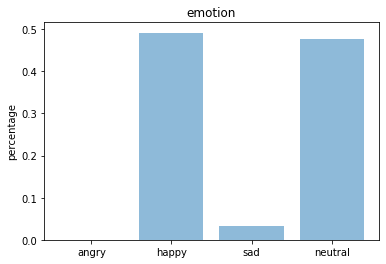

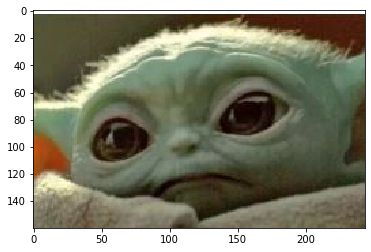

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

test_file = 'yoda.JPG'
test_image = image.load_img(test_file)
image_test = image.load_img(test_file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(image_test)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)

emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(test_image)
plt.show()